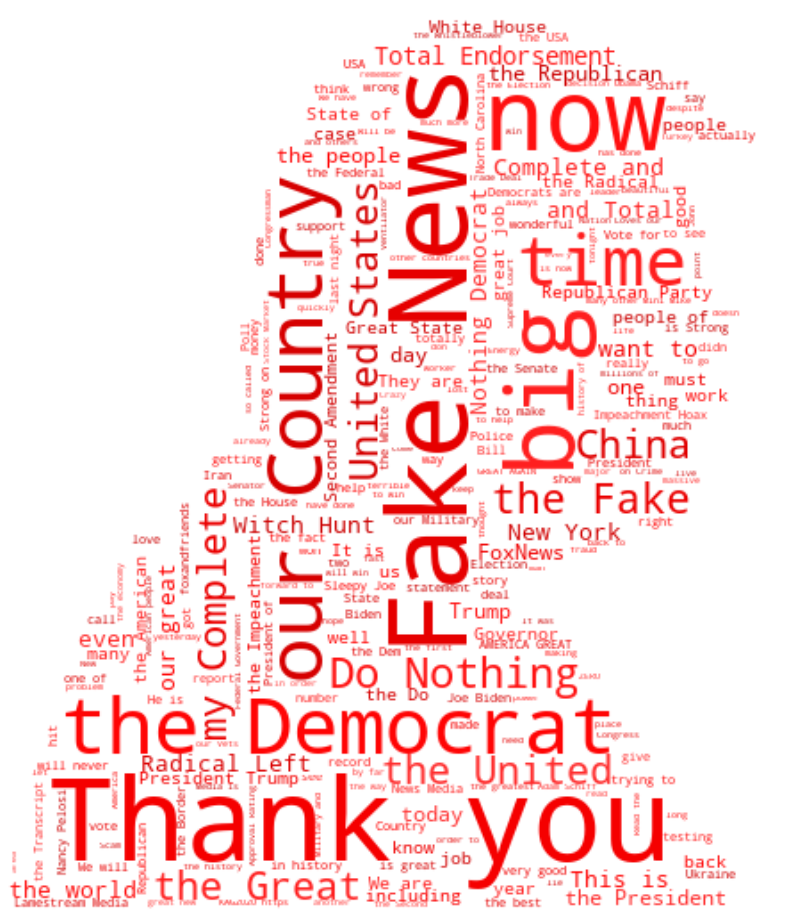

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import random
from PIL import Image

df_tweets = pd.read_csv('https://raw.githubusercontent.com/ynylgm/Data-Visualization/master/trump-twitter/realDonaldTrump_tweets.csv')

df_tweets = df_tweets[~df_tweets['text'].astype(str).str.startswith('RT')]
df_tweets.reset_index(drop=True, inplace=True)

text = ''
for i in range(len(df_tweets)):
    text = text + df_tweets.loc[i].text
    
stopwords = set(STOPWORDS)
addition = {'https', 'co', 'Thank you', 'will be', 'We will', 'said', 'going to', 'amp', 
            'thank you', 'will', 'This is', 'this', 'This', 'going', 'want to', 'We are', 'It is'}
[stopwords.add(n) for n in addition]

!wget --quiet https://miro.medium.com/max/878/1*ALByHE3fv8xNfD1eTx12XQ.png
trump_mask = np.array(Image.open('1*ALByHE3fv8xNfD1eTx12XQ.png'))

def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(40, 60)

trump_wc = WordCloud(background_color='white', max_words=2000, mask=trump_mask, stopwords=stopwords)

trump_wc.generate(text)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(trump_wc.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.savefig('trump-tweets-wordcloud.png')
plt.show()